# Weather and Climate: Patterns As We Approach the Equator

Using the Open Weather API to take a random sample of cities from around the world, we can begin to glean a handful of trends regarding weather and climate as we change latitudes.

The first trend that may seem obvious is regarding temperature levels. We can see definitively that a city's max temperature rises proportionally as its latitude approaches zero (i.e as it gets closer to the equator). Cities at the upper bound of our latitude range (60° to 80°), the max temperature retrieved went as low as sub-zero Fahrenheit. Meanwhile, cities nearer the equator had average temps hovering around 100° Fahrenheit.

Humidity has a similar yet less pronounced relationship with latitude. All cities found with 15° of the equator had a humidity level of at least ~40%. As we leave these ranges and enter the 20° to 40° range (and -20° to -40°) we start to more variety. Some cities have lower humidity levels of even 0% but there are still cities with much higher levels present. Leaving this range and going further north, we again see the same levels we saw at the equator with almost no cities having a humidity level less than ~40%. We can conlude that arid climates and ecosystems are limited to the ranges we observed (20° to 40° and -20° to -40°), and outside of these ranges conditions are not favorable for their development.

Cloud level has little discernible relationship with latitude. It seems equally likely, regardless of where one finds oneself latitudinally, that a city may be very cloudy or cloudless.

Wind speed appears to have an inverse relationship with latitude than temperature does. While the large majority of cities sampled had wind speeds capped at ~15 mph, there were some outlier cities that had much higher speeds, even reaching up to ~40 mph. The observable trend here is that none of these cities with the relatively high wind speeds were located near the equator. Instead, they were all found at the extremes of our latitude range; either far north or far south.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "/Users/danvaldes/Desktop/bootcamp/api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
coords = []
cities = []

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)
coords = zip(lat, lon)

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [4]:
city_name = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_lat = []

record = 0
set_count = 0

print('Beginning Data Retrieval\n--------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    
    if record < 50:
        record += 1
        
    else: 
        set_count += 1
        record = 0
    
    print(f'Processing record {record} of set {set_count} | {city}')
    print(url)
    try:
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
    except:
        print('City not found. Skipping...')
        pass

print('--------------------\nData Retrieval Complete\n--------------------')

Beginning Data Retrieval
--------------------
Processing record 1 of set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 2 of set 0 | sao filipe
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 3 of set 0 | port blair
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 4 of set 0 | kapaa
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 5 of set 0 | port alfred
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 6 of set 0 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 7 of set 0 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 8 of set 0 | atuona
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record

Processing record 22 of set 1 | kavieng
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 23 of set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 24 of set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 25 of set 1 | raudeberg
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 26 of set 1 | velikiy ustyug
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 27 of set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 28 of set 1 | aitape
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 29 of set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 30 of set 1 | merauke
http://api.openweathe

Processing record 44 of set 2 | nanortalik
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 45 of set 2 | lasa
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 46 of set 2 | novobiryusinskiy
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 47 of set 2 | belmonte
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 48 of set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 49 of set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 50 of set 2 | bengkulu
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 0 of set 3 | necochea
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 1 of set 3 | saint-philippe
http://api.open

Processing record 13 of set 4 | pocatello
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 14 of set 4 | boo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 15 of set 4 | nipawin
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 16 of set 4 | esperance
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 17 of set 4 | laguna
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 18 of set 4 | tiksi
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 19 of set 4 | kununurra
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 20 of set 4 | eldikan
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 21 of set 4 | georgetown
http://api.openweathermap.org/

Processing record 35 of set 5 | sorkjosen
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 36 of set 5 | bourges
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 37 of set 5 | tateyama
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 38 of set 5 | benguela
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 39 of set 5 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 40 of set 5 | lompoc
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 41 of set 5 | ngukurr
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 42 of set 5 | hasaki
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 43 of set 5 | iralaya
http://api.openweathermap

Processing record 5 of set 7 | zhangye
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 6 of set 7 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 7 of set 7 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 8 of set 7 | kasongo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 9 of set 7 | richards bay
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 10 of set 7 | perigueux
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 11 of set 7 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 12 of set 7 | grinnell
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 13 of set 7 | marsa matruh
http://api.o

Processing record 24 of set 8 | saldanha
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 25 of set 8 | ginda
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 26 of set 8 | senanga
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 27 of set 8 | egvekinot
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 28 of set 8 | zhumadian
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 29 of set 8 | burnie
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 30 of set 8 | mendi
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 31 of set 8 | tubruq
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 32 of set 8 | margate
http://api.openweathermap.org/dat

Processing record 44 of set 9 | novyy urgal
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 45 of set 9 | alyangula
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 46 of set 9 | paradwip
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 47 of set 9 | pacific grove
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 48 of set 9 | inirida
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 49 of set 9 | port macquarie
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 50 of set 9 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 0 of set 10 | omurtag
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 1 of set 10 | golden
http://

Processing record 13 of set 11 | hami
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 14 of set 11 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 15 of set 11 | igarka
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 16 of set 11 | sao domingos
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 17 of set 11 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 18 of set 11 | acin
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 19 of set 11 | hobyo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 20 of set 11 | ruwi
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 21 of set 11 | uttarkashi
http://api.openwea

In [5]:
city_data = pd.DataFrame({
    'City':city_name,
    'Max Temperature (F):':temp,
    'Humidity (%)':humidity,
    'Cloudiness (%)':cloudiness,
    'Wind Speed (mph)':windspeed,
    'Latitude':city_lat
})
city_data;

city_data.to_csv(output_file)

In [ ]:
pprint(response);

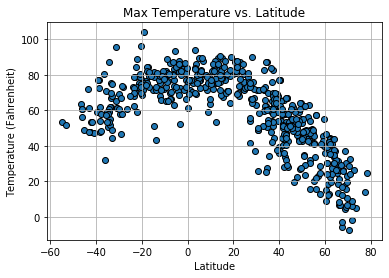

In [6]:
plt.scatter(city_lat, temp, marker = 'o', edgecolors = 'black');

plt.title('Max Temperature vs. Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig("MaxTempperLatitude.png")

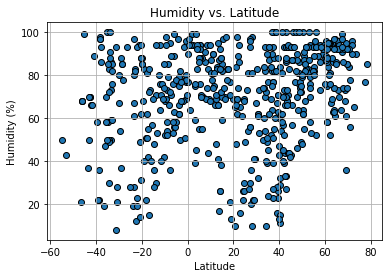

In [7]:
plt.scatter(city_lat, humidity, marker = 'o', edgecolors = 'black')

plt.title('Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig("HumidityperLatitude.png")

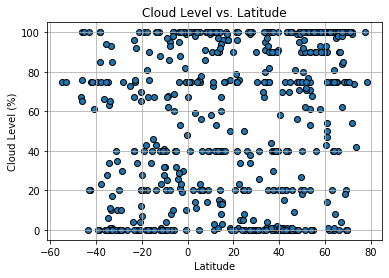

In [8]:
plt.scatter(city_lat, cloudiness, marker = 'o', edgecolors = 'black')

plt.title('Cloud Level vs. Latitude')
plt.ylabel('Cloud Level (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig("CloudLevelperLatitude.png")

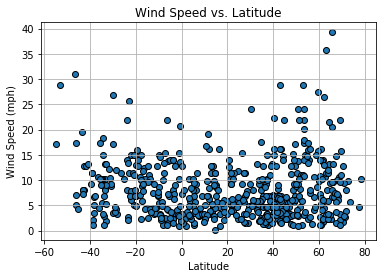

In [9]:
plt.scatter(city_lat, windspeed, marker = 'o', edgecolors = 'black')

plt.title('Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig("WindSpeedperLatitude.png")